<a href="https://colab.research.google.com/github/ChauNgo1106/cs480student/blob/main/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

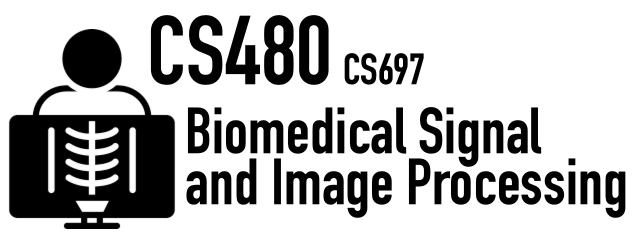
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset , in 5 minutes


In [ ]:
SAMPLING_RATE = 360 #SAMPLING_RATE is 360Hz, 360 signal per seconds

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

Text(0.5, 0, 'Second(s)')

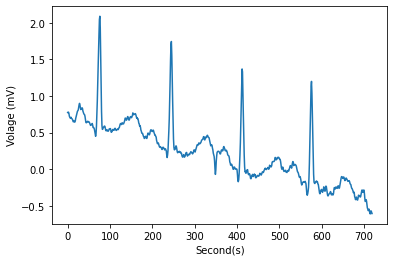

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

from9to11seconds = ecg[8 * SAMPLING_RATE : 10 * SAMPLING_RATE]
from10to12seconds = ecg[9 * SAMPLING_RATE : 11 * SAMPLING_RATE]
plt.plot(from9to11seconds)
plt.ylabel("Volage (mV)")
plt.xlabel("Second(s)")

#doing some stuff with ecg
#ecg.shape, ecg.mean(), ecg.std(), ecg.size
#time = np.arange(ecg.size) / SAMPLING_RATE
#plt.plot(time,ecg)
#plt.xlabel("Second")
#plt.ylabel("Voltage (-mV)")
#plt.xlim(9,11)
#ecg[0:360] #first second of ecg
#first two second , 1 second contains 360 samples
#ecg[0 : 720]
#only second number 2
#ecg[360 * 1: 360 * 2]
#only second number 3
#ecg[360 * 2: 360 * 3]


Text(0.5, 0, 'Second(s)')

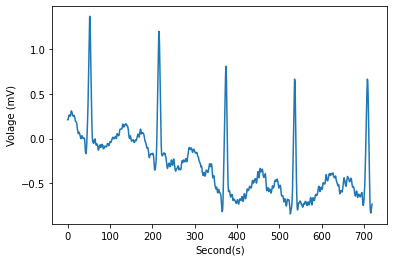

In [ ]:
plt.plot(from10to12seconds)
plt.ylabel("Volage (mV)")
plt.xlabel("Second(s)")

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE) #return a dictionary in which R-peaks located, S-peaks, Q-peaks,...

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten


[ 125  343  552  748  944 1130 1317 1501 1691 1880]


[ 125  343  552  748  944 1130 1317 1501 1691 1880]


(0.0, 1000.0)

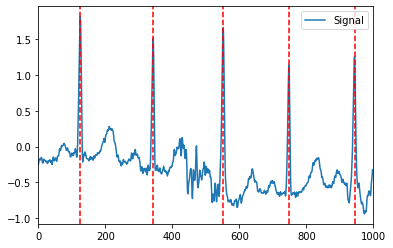

In [ ]:
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten
#the whole R-peaks plot in the graph below from 5 r peaks
plot1 = nk.events_plot(rpeaks['ECG_R_Peaks'][:5] , ecg[:1000])
plt.xlim(0,1000)

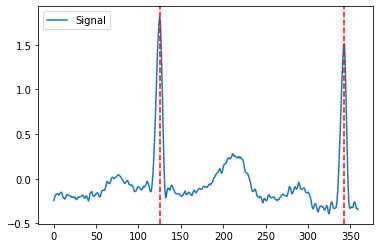

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

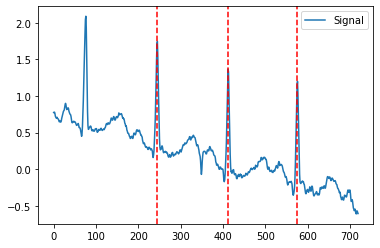

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1
#from 9 to 11 seconds
_, rpeaks = nk.ecg_peaks(from9to11seconds, sampling_rate=SAMPLING_RATE)
plot2 = nk.events_plot(rpeaks['ECG_R_Peaks'][:5] , from9to11seconds[:1000])


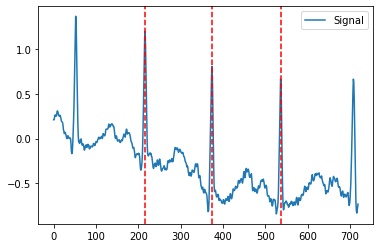

In [ ]:
#from 10 to 12 seconds
_, rpeaks = nk.ecg_peaks(from10to12seconds, sampling_rate=SAMPLING_RATE)
plot3 = nk.events_plot(rpeaks['ECG_R_Peaks'][:5] , from10to12seconds[:1000])


**Task 3:** Detect Heartrate. [15 Points]

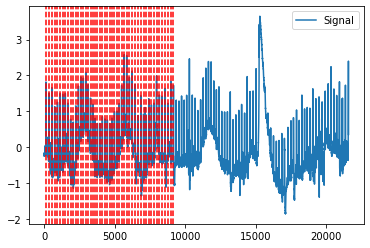

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 
#I can use the ecg_peaks function to indicate the rpeaks of this person in one minute (SAMPLING_RATE * 60)
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:50], ecg[0:SAMPLING_RATE*60])
#plt.xlim(0,21600)

#the S-T depression can cause abnormal heart rate
#the R-peaks seem very high at approximately sample 15200 as we have seen the ecg below. 
#Also the depession from signal 125Hz to500
#elevation of ST interval from 2000 to 3000Hz
#then depression from 3500 to 4000
#I guess this type of irregular hear rate.  


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

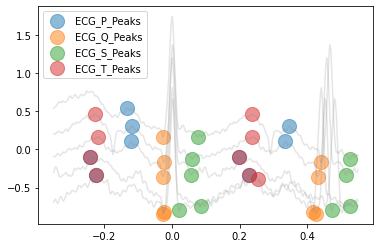

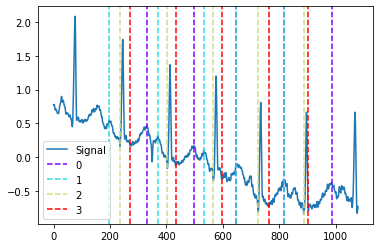

In [ ]:
# TODO Does the detection work well?
#delineate the ECG signal using ecg_delineate

#we can not use nk.ecg_delineate to detect R spikes and P,Q,S,T waves from 9 to 11 seconds due to lack of R peaks. 
#the minimum R peaks is required at least 5. 
#Thus I have to get ecg from 9 to 12 seconds rather than 9 to 11 seconds

from9to12seconds = ecg[8 * SAMPLING_RATE : 11 * SAMPLING_RATE]

_, rpeaks = nk.ecg_peaks(from9to12seconds, sampling_rate=SAMPLING_RATE)
_,waves_peak = nk.ecg_delineate(from9to12seconds , rpeaks['ECG_R_Peaks'][0:5], 
                                sampling_rate= SAMPLING_RATE, show = True, show_type = "peaks")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5] , 
                       waves_peak['ECG_P_Peaks'][:5] ,
                       waves_peak['ECG_Q_Peaks'][:5] ,
                       waves_peak['ECG_S_Peaks'][:5]] , from9to12seconds)


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

(0.0, 1000.0)

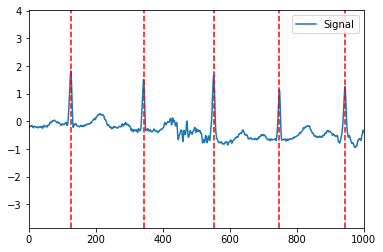

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg)
plt.xlim(0,1000)

(0.0, 1000.0)

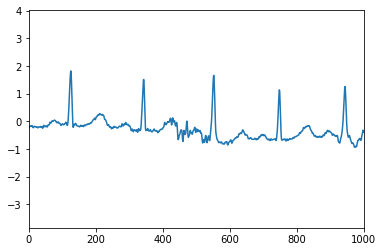

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

#sampling rate must exceed the Nyquist rate to avoid aliasing problem . highcut must < 360/2 = 180
#lowcut is 0 and highcut is 179 should work well with sampling rate 360
new_range = nk.signal_filter(ecg, sampling_rate= SAMPLING_RATE , lowcut= 0 , highcut= 179 , method= 'butterworth')
plt.plot(new_range)
plt.xlim(0, 1000)

In [ ]:
# TODO Does the filtering improve the result?
#Answer: Yes it does.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#